# Course3
## Natural Language Processing in TensorFlow
## Week4

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [3]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [4]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [5]:
print(xs[6])
print(ys[6])
print(xs[5])
print(ys[5])

[ 0  0  0  4  2 66  8 67 68 69]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [6]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [7]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
15/15 [==============================] - 0s 4ms/step - loss: 5.5670 - accuracy: 0.0265
Epoch 2/500
15/15 [==============================] - 0s 4ms/step - loss: 5.5375 - accuracy: 0.0508
Epoch 3/500
15/15 [==============================] - 0s 4ms/step - loss: 5.4630 - accuracy: 0.0508
Epoch 4/500
15/15 [==============================] - 0s 4ms/step - loss: 5.2813 - accuracy: 0.0508
Epoch 5/500
15/15 [==============================] - 0s 4ms/step - loss: 5.1178 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 4ms/step - loss: 5.0547 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 4ms/step - loss: 5.0216 - accuracy: 0.0596
Epoch 8/500
15/15 [==============================] - 0s 4ms/step - loss: 4.9930 - accuracy: 0.0486
Epoch 9/500
15/15 [==============================] - 0s 4ms/step - loss: 4.9634 - accuracy: 0.0508
Epoch 10/500
15/15 [==============================] - 0s 4ms/step - loss: 4.9316 - accuracy: 0.0574
Epoch 11/

15/15 [==============================] - 0s 4ms/step - loss: 2.3250 - accuracy: 0.5828
Epoch 84/500
15/15 [==============================] - 0s 5ms/step - loss: 2.3171 - accuracy: 0.5960
Epoch 85/500
15/15 [==============================] - 0s 4ms/step - loss: 2.2932 - accuracy: 0.5916
Epoch 86/500
15/15 [==============================] - 0s 6ms/step - loss: 2.2843 - accuracy: 0.5938
Epoch 87/500
15/15 [==============================] - 0s 4ms/step - loss: 2.2563 - accuracy: 0.6071
Epoch 88/500
15/15 [==============================] - 0s 4ms/step - loss: 2.2463 - accuracy: 0.6093
Epoch 89/500
15/15 [==============================] - 0s 5ms/step - loss: 2.2213 - accuracy: 0.5982
Epoch 90/500
15/15 [==============================] - 0s 5ms/step - loss: 2.1991 - accuracy: 0.6026
Epoch 91/500
15/15 [==============================] - 0s 4ms/step - loss: 2.1604 - accuracy: 0.6203
Epoch 92/500
15/15 [==============================] - 0s 4ms/step - loss: 2.1273 - accuracy: 0.6291
Epoch 93/500


Epoch 164/500
15/15 [==============================] - 0s 4ms/step - loss: 0.9993 - accuracy: 0.8631
Epoch 165/500
15/15 [==============================] - 0s 4ms/step - loss: 0.9931 - accuracy: 0.8698
Epoch 166/500
15/15 [==============================] - 0s 4ms/step - loss: 0.9882 - accuracy: 0.8631
Epoch 167/500
15/15 [==============================] - 0s 4ms/step - loss: 0.9725 - accuracy: 0.8675
Epoch 168/500
15/15 [==============================] - 0s 4ms/step - loss: 0.9578 - accuracy: 0.8808
Epoch 169/500
15/15 [==============================] - 0s 4ms/step - loss: 0.9464 - accuracy: 0.8764
Epoch 170/500
15/15 [==============================] - 0s 4ms/step - loss: 0.9364 - accuracy: 0.8808
Epoch 171/500
15/15 [==============================] - 0s 4ms/step - loss: 0.9262 - accuracy: 0.8874
Epoch 172/500
15/15 [==============================] - 0s 4ms/step - loss: 0.9152 - accuracy: 0.8940
Epoch 173/500
15/15 [==============================] - 0s 4ms/step - loss: 0.9056 - accurac

Epoch 244/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4576 - accuracy: 0.9404
Epoch 245/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4525 - accuracy: 0.9426
Epoch 246/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4497 - accuracy: 0.9404
Epoch 247/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4454 - accuracy: 0.9448
Epoch 248/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4417 - accuracy: 0.9448
Epoch 249/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4384 - accuracy: 0.9404
Epoch 250/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4339 - accuracy: 0.9448
Epoch 251/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4304 - accuracy: 0.9448
Epoch 252/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4278 - accuracy: 0.9448
Epoch 253/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4309 - accurac

15/15 [==============================] - 0s 4ms/step - loss: 0.2543 - accuracy: 0.9426
Epoch 325/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2523 - accuracy: 0.9448
Epoch 326/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2507 - accuracy: 0.9492
Epoch 327/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2496 - accuracy: 0.9492
Epoch 328/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2485 - accuracy: 0.9448
Epoch 329/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2495 - accuracy: 0.9492
Epoch 330/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 0.9470
Epoch 331/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2516 - accuracy: 0.9492
Epoch 332/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2468 - accuracy: 0.9492
Epoch 333/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2462 - accuracy: 0.9492
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.1789 - accuracy: 0.9514
Epoch 406/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1933 - accuracy: 0.9470
Epoch 407/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2513 - accuracy: 0.9316
Epoch 408/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2902 - accuracy: 0.9227
Epoch 409/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3216 - accuracy: 0.9139
Epoch 410/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2837 - accuracy: 0.9227
Epoch 411/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2719 - accuracy: 0.9272
Epoch 412/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2617 - accuracy: 0.9338
Epoch 413/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2474 - accuracy: 0.9316
Epoch 414/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2167 - accuracy: 0.9492
Epoc

15/15 [==============================] - 0s 4ms/step - loss: 0.1326 - accuracy: 0.9448
Epoch 487/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1319 - accuracy: 0.9492
Epoch 488/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1328 - accuracy: 0.9470
Epoch 489/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1320 - accuracy: 0.9514
Epoch 490/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1315 - accuracy: 0.9514
Epoch 491/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1310 - accuracy: 0.9514
Epoch 492/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1308 - accuracy: 0.9492
Epoch 493/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1299 - accuracy: 0.9514
Epoch 494/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1300 - accuracy: 0.9492
Epoch 495/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1290 - accuracy: 0.9514
Epoc

In [8]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

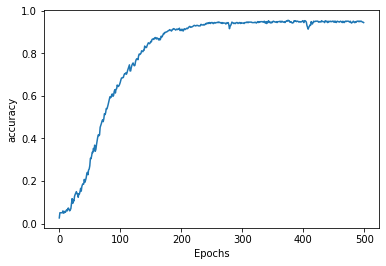

In [9]:
plot_graphs(history, 'accuracy')

In [10]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Laurence went to dublin the piper was near being strangled hall hall hall hall glisten ask glisten then made him a bacon lanigans the her relations a jig jig painted painted brothers ball away i suppose suppose gave again he meelia murther hall hall ned hall ned hall ned morgan call powerful and able rat catchers daughter red as a daughter daughter saw as hearty saw were hearty cheeks away entangled mavrone nothing at all ladies ladies they were hearty didnt up cask saw up hearty boys up a pound pound man in again taras man ground ground suppose gave odaly hullabaloo rat hall


# Laurence the poet!

In [11]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

In [12]:
tokenizer = Tokenizer()

data = open('source/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [13]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [14]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [15]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [16]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [17]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [18]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [19]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100
377/377 [==============================] - 13s 35ms/step - loss: 6.6354 - accuracy: 0.07260s - loss: 6.655
Epoch 2/100
377/377 [==============================] - 13s 34ms/step - loss: 5.7275 - accuracy: 0.11461s - loss: 5.7197 - accuracy
Epoch 3/100
377/377 [==============================] - 14s 38ms/step - loss: 4.8356 - accuracy: 0.1668
Epoch 4/100
377/377 [==============================] - 13s 34ms/step - loss: 3.9266 - accuracy: 0.2387
Epoch 5/100
377/377 [==============================] - 13s 34ms/step - loss: 3.1136 - accuracy: 0.3360
Epoch 6/100
377/377 [==============================] - 13s 34ms/step - loss: 2.4152 - accuracy: 0.4515
Epoch 7/100
377/377 [==============================] - 13s 35ms/step - loss: 1.9165 - accuracy: 0.55462s - loss: 1.8402 - accuracy - ETA: 2s -
Epoch 8/100
377/377 [==============================] - 13s 34ms/step - loss: 1.6037 - accuracy: 0.6178
Epoch 9/100
377/377 [==============================] - 13s 35ms/step - loss: 1.3796 - accura

377/377 [==============================] - 12s 32ms/step - loss: 0.8418 - accuracy: 0.7772
Epoch 79/100
377/377 [==============================] - 11s 30ms/step - loss: 0.8818 - accuracy: 0.7647
Epoch 80/100
377/377 [==============================] - 11s 29ms/step - loss: 0.8795 - accuracy: 0.7641
Epoch 81/100
377/377 [==============================] - 12s 31ms/step - loss: 0.8770 - accuracy: 0.7661
Epoch 82/100
377/377 [==============================] - 12s 33ms/step - loss: 0.8256 - accuracy: 0.7767
Epoch 83/100
377/377 [==============================] - 11s 29ms/step - loss: 0.8520 - accuracy: 0.7769
Epoch 84/100
377/377 [==============================] - 11s 28ms/step - loss: 0.8325 - accuracy: 0.7766
Epoch 85/100
377/377 [==============================] - 11s 29ms/step - loss: 0.8090 - accuracy: 0.7846
Epoch 86/100
377/377 [==============================] - 11s 30ms/step - loss: 0.7698 - accuracy: 0.7907
Epoch 87/100
377/377 [==============================] - 12s 32ms/step - loss:

In [20]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

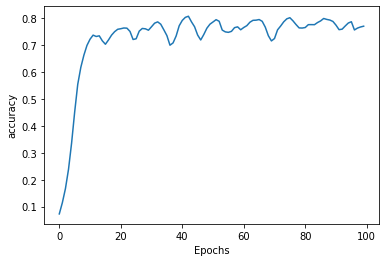

In [21]:
plot_graphs(history, 'accuracy')

In [22]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this noon the sash is torn away is mad at gone away gone is gone nor here in spring in they may blarney so green love so gone love gone and cried meelia murther gone no phantom gone twinkle gone and love it is gone with here in sunshine brothers here but gone gone away your eyes here in gone gone gone away your roof love gone and love died love me love gone and gone the shamrock gone gone and pain gone away in comicality love gone and gone with like fairy fathers bell gone tree and gone your love
